# The communes and wards name:

In [1]:
# Collect the list of communes and wards of Nha Trang City from website by using Beautiful Soup library
from bs4 import BeautifulSoup
import requests

data = requests.get("https://vi.wikipedia.org/wiki/Th%E1%BB%83_lo%E1%BA%A1i:X%C3%A3,_ph%C6%B0%E1%BB%9Dng_thu%E1%BB%99c_th%C3%A0nh_ph%E1%BB%91_Nha_Trang").text
soup = BeautifulSoup(data, 'html.parser')
commune_list = []
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    commune_list.append(row.text.split(",")[0].split(" (")[0])

commune_list

['Lộc Thọ',
 'Ngọc Hiệp',
 'Phước Đồng',
 'Phước Hải',
 'Phước Hòa',
 'Phước Long',
 'Phước Tân',
 'Phước Tiến',
 'Phương Sài',
 'Phương Sơn',
 'Tân Lập',
 'Vạn Thạnh',
 'Vạn Thắng',
 'Vĩnh Hải',
 'Vĩnh Hiệp',
 'Vĩnh Hòa',
 'Vĩnh Lương',
 'Vĩnh Ngọc',
 'Vĩnh Nguyên',
 'Vĩnh Phước',
 'Vĩnh Phương',
 'Vĩnh Thái',
 'Vĩnh Thạnh',
 'Vĩnh Thọ',
 'Vĩnh Trung',
 'Vĩnh Trường',
 'Xương Huân']

In [2]:
# Converts Vietnamese text with accents to text without accents through Regex library
import re

patterns = {
    '[àáảãạăắằẵặẳâầấậẫẩ]': 'a',
    '[đ]': 'd',
    '[èéẻẽẹêềếểễệ]': 'e',
    '[ìíỉĩị]': 'i',
    '[òóỏõọôồốổỗộơờớởỡợ]': 'o',
    '[ùúủũụưừứửữự]': 'u',
    '[ỳýỷỹỵ]': 'y'
}

def convert(text):
    output = text
    for regex, replace in patterns.items():
        output = re.sub(regex, replace, output)
        output = re.sub(regex.upper(), replace.upper(), output)
    return output

commune_list_new = []
for row in commune_list:
    row = convert(row)
    commune_list_new.append(row)

commune_list = commune_list_new
commune_list

['Loc Tho',
 'Ngoc Hiep',
 'Phuoc Dong',
 'Phuoc Hai',
 'Phuoc Hoa',
 'Phuoc Long',
 'Phuoc Tan',
 'Phuoc Tien',
 'Phuong Sai',
 'Phuong Son',
 'Tan Lap',
 'Van Thanh',
 'Van Thang',
 'Vinh Hai',
 'Vinh Hiep',
 'Vinh Hoa',
 'Vinh Luong',
 'Vinh Ngoc',
 'Vinh Nguyen',
 'Vinh Phuoc',
 'Vinh Phuong',
 'Vinh Thai',
 'Vinh Thanh',
 'Vinh Tho',
 'Vinh Trung',
 'Vinh Truong',
 'Xuong Huan']

# The longitude and latitude:

In [3]:
# Get the coordinates by using Geocoder library
import geocoder

def get_lat_long(neighborhood):
    lat_long = None
    while(lat_long is None):
        g = geocoder.arcgis('{}, Nha Trang, Khanh Hoa, Vietnam'.format(neighborhood))
        lat_long = g.latlng
    return lat_long

lat_long = [get_lat_long(neighborhood) for neighborhood in commune_list]
lat_long

[[12.243585, 109.194648],
 [12.255411, 109.173086],
 [12.1898573, 109.167085],
 [12.2407682, 109.1815852],
 [12.236575, 109.184778],
 [12.212176, 109.194663],
 [12.2467998, 109.188338],
 [12.241277, 109.186169],
 [12.250147, 109.185822],
 [12.250533, 109.178639],
 [12.243874, 109.192813],
 [12.25266, 109.191383],
 [12.2519072, 109.1887248],
 [12.281106, 109.194187],
 [12.2549988, 109.1605505],
 [12.289147, 109.204927],
 [12.3374149, 109.1964923],
 [12.267589, 109.162561],
 [12.21279, 109.211532],
 [12.269764, 109.197395],
 [12.273159, 109.146709],
 [12.2401186, 109.1628073],
 [12.25853, 109.149075],
 [12.264854, 109.197356],
 [12.256085, 109.133644],
 [12.206845, 109.202583],
 [12.255899, 109.1952817]]

In [4]:
# Create "nhatrang" dataframe to populate the coordinates into latitude and longitude
import pandas as pd

nhatrang = pd.DataFrame(commune_list, columns=['Commune'])
coordinates = pd.DataFrame(lat_long, columns=['Latitude', 'Longitude'])
nhatrang['Latitude'] = coordinates['Latitude']
nhatrang['Longitude'] = coordinates['Longitude']
nhatrang

C:\Users\Admin\AppData\Local\Temp\ipykernel_13520\4051425325.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Commune,Latitude,Longitude
0,Loc Tho,12.243585,109.194648
1,Ngoc Hiep,12.255411,109.173086
2,Phuoc Dong,12.189857,109.167085
3,Phuoc Hai,12.240768,109.181585
4,Phuoc Hoa,12.236575,109.184778
5,Phuoc Long,12.212176,109.194663
6,Phuoc Tan,12.246800,109.188338
7,Phuoc Tien,12.241277,109.186169
8,Phuong Sai,12.250147,109.185822
9,Phuong Son,12.250533,109.178639


# The population, square and density:

In [5]:
# Collect population, square of the communes and wards of Nha Trang City from website by using Beautiful Soup library
data = requests.get("https://gis.khanhhoa.gov.vn/public/2/568/", verify=False).text
soup = BeautifulSoup(data, 'html.parser')
population_commune_list = []
for row in soup.find_all("div", class_="scrollable")[0].findAll("label"):
    if "Phường " in row.text:
        population_commune_list.append(row.text.split("Phường ")[1])
    if "Xã " in row.text:
        population_commune_list.append(row.text.split("Xã ")[1])

square = []
population = []
for row in soup.find_all("div", class_="scrollable")[0].findAll("li"):
    if "Diện" in row.text:
        square.append(row.text.split(" ")[-2])
    if "Dân" in row.text:
        population.append(row.text.split(" ")[-1])
square = square[1:]
population = population[1:]

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gis.khanhhoa.gov.vn'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [6]:
# Converts Vietnamese text with accents to text without accents through Regex library
population_commune_list_new = []
for row in population_commune_list:
    row = convert(row)
    population_commune_list_new.append(row)

population_commune_list = population_commune_list_new
population_commune_list

['Vinh Hoa',
 'Vinh Hai',
 'Vinh Phuoc',
 'Ngoc Hiep',
 'Vinh Tho',
 'Xuong Huan',
 'Van Thang',
 'Van Thanh',
 'Phuong Sai',
 'Phuong Son',
 'Phuoc Hai',
 'Phuoc Tan',
 'Loc Tho',
 'Phuoc Tien',
 'Tan Lap',
 'Phuoc Hoa',
 'Vinh Nguyen',
 'Phuoc Long',
 'Vinh Truong',
 'Vinh Luong',
 'Vinh Phuong',
 'Vinh Ngoc',
 'Vinh Thanh',
 'Vinh Trung',
 'Vinh Hiep',
 'Vinh Thai',
 'Phuoc Dong']

In [7]:
# Create dataframe to populate the population and square
population_list = pd.DataFrame(population_commune_list, columns=["Commune"])
population_list["Square"] = square
population_list["Population"] = population
population_list

,Commune,Square,Population
0,Vinh Hoa,"11,56",9.369
1,Vinh Hai,"4,48",13.933
2,Vinh Phuoc,"1,7",24.445
3,Ngoc Hiep,"3,62",11.887
4,Vinh Tho,"0,67",16.514
5,Xuong Huan,"0,64",13.353
6,Van Thang,"0,37",10.524
7,Van Thanh,"0,39",11.944
8,Phuong Sai,"0,38",11.890
9,Phuong Son,"0,46",10.039


In [8]:
# Merge "nhatrang" dataframe with the population and square dataframe
nhatrang = nhatrang.merge(population_list,on='Commune',how='inner')
nhatrang

,Commune,Latitude,Longitude,Square,Population
0,Loc Tho,12.243585,109.194648,"1,4",12.802
1,Ngoc Hiep,12.255411,109.173086,"3,62",11.887
2,Phuoc Dong,12.189857,109.167085,"56,65",19.095
3,Phuoc Hai,12.240768,109.181585,"2,56",15.370
4,Phuoc Hoa,12.236575,109.184778,"1,01",12.657
5,Phuoc Long,12.212176,109.194663,"4,27",17.101
6,Phuoc Tan,12.246800,109.188338,"0,47",13.765
7,Phuoc Tien,12.241277,109.186169,"0,28",9.934
8,Phuong Sai,12.250147,109.185822,"0,38",11.890
9,Phuong Son,12.250533,109.178639,"0,46",10.039


In [9]:
# Convert "Square" column to float type and "Population" column to int type by using the Pandas Python module
for i in range(len(nhatrang)):
    nhatrang["Square"][i] = nhatrang["Square"][i].replace(",", ".")
    nhatrang["Population"][i] = nhatrang["Population"][i].replace(".", "")

nhatrang['Square'] = nhatrang["Square"].astype(float)
nhatrang["Population"] = nhatrang['Population'].astype(int)
nhatrang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Commune     27 non-null     object 
 1   Latitude    27 non-null     float64
 2   Longitude   27 non-null     float64
 3   Square      27 non-null     float64
 4   Population  27 non-null     int32  
dtypes: float64(3), int32(1), object(1)
memory usage: 1.1+ KB


C:\Users\Admin\AppData\Local\Temp\ipykernel_13520\1014968100.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  nhatrang["Square"][i] = nhatrang["Square"][i].replace(",", ".")
C:\Users\Admin\AppData\Local\Temp\ipykernel_13520\1014968100.py:

In [10]:
# Caculate the density of the communes and wards of Nha Trang City
nhatrang["Density"] = round(nhatrang["Population"] / nhatrang["Square"],0).astype(int)
nhatrang

,Commune,Latitude,Longitude,Square,Population,Density
0,Loc Tho,12.243585,109.194648,1.40,12802,9144
1,Ngoc Hiep,12.255411,109.173086,3.62,11887,3284
2,Phuoc Dong,12.189857,109.167085,56.65,19095,337
3,Phuoc Hai,12.240768,109.181585,2.56,15370,6004
4,Phuoc Hoa,12.236575,109.184778,1.01,12657,12532
5,Phuoc Long,12.212176,109.194663,4.27,17101,4005
6,Phuoc Tan,12.246800,109.188338,0.47,13765,29287
7,Phuoc Tien,12.241277,109.186169,0.28,9934,35479
8,Phuong Sai,12.250147,109.185822,0.38,11890,31289
9,Phuong Son,12.250533,109.178639,0.46,10039,21824


# The average housing price:

In [11]:
# Collect the link which contains housing price of the communes and wards of Nha Trang City from website by using Beautiful Soup library
data = requests.get("https://mogi.vn/gia-nha-dat-tp-nha-trang-qd410").text
soup = BeautifulSoup(data, 'html.parser')
price_commune_link = []
price_commune_list = []
for row in soup.find_all("div", class_="widget similar")[1].findAll("a"):
    price_commune_link.append(row.get("href"))
    if "Phường " in row.text:
        price_commune_list.append(row.text.split(" (")[0].split("Phường ")[1])
    if "Xã " in row.text:
        price_commune_list.append(row.text.split(" (")[0].split("Xã ")[1])

price_commune_list

['Lộc Thọ',
 'Ngọc Hiệp',
 'Phước Hải',
 'Phước Hòa',
 'Phước Long',
 'Phước Tân',
 'Phước Tiến',
 'Phương Sài',
 'Phương Sơn',
 'Tân Lập',
 'Vạn Thạnh',
 'Vạn Thắng',
 'Vĩnh Hải',
 'Vĩnh Hòa',
 'Vĩnh Nguyên',
 'Vĩnh Phước',
 'Vĩnh Thọ',
 'Vĩnh Trường',
 'Xương Huân',
 'Phước Đồng',
 'Vĩnh Hiệp',
 'Vĩnh Lương',
 'Vĩnh Ngọc',
 'Vĩnh Phương',
 'Vĩnh Thái',
 'Vĩnh Thạnh',
 'Vĩnh Trung']

In [12]:
# Calculate the average housing price of the communes and wards of Nha Trang City
import numpy as np

average_price = []
for i in range(len(price_commune_link)):
    data = requests.get("https://mogi.vn" + price_commune_link[i]).text
    soup = BeautifulSoup(data, 'html.parser')
    price_list = []
    for row in soup.find("ul", class_="props").find_all("div", class_="prop-info"):
        square = row.find("ul", class_="prop-attr").findAll("li")[0].text.split(" ")[0]
        price_string = row.find("div", class_="price").text
        
        if len(price_string.split(" ")) > 2:
            price = price_string.split(" ")[0] + price_string.split(" ")[2]
        else:
            if price_string.split(" ")[1] == "tỷ": price = price_string.split(" ")[0] + "000"
            else: price = price_string.split(" ")[0]
        price_list.append(round(int(price)/int(square),1))

    average_price.append(round(np.mean(price_list),1))

average_price

[262.1,
 34.9,
 34.4,
 91.4,
 49.5,
 47.3,
 113.9,
 165.8,
 24.8,
 114.7,
 82.2,
 109.1,
 40.8,
 39.5,
 45.2,
 46.5,
 67.5,
 49.2,
 150.3,
 29.8,
 30.0,
 5.5,
 29.0,
 10.2,
 37.2,
 17.7,
 17.9]

In [13]:
# Converts Vietnamese text with accents to text without accents through Regex library
price_commune_list_new = []
for row in price_commune_list:
    row = convert(row)
    price_commune_list_new.append(row)

price_commune_list = price_commune_list_new
price_commune_list

['Loc Tho',
 'Ngoc Hiep',
 'Phuoc Hai',
 'Phuoc Hoa',
 'Phuoc Long',
 'Phuoc Tan',
 'Phuoc Tien',
 'Phuong Sai',
 'Phuong Son',
 'Tan Lap',
 'Van Thanh',
 'Van Thang',
 'Vinh Hai',
 'Vinh Hoa',
 'Vinh Nguyen',
 'Vinh Phuoc',
 'Vinh Tho',
 'Vinh Truong',
 'Xuong Huan',
 'Phuoc Dong',
 'Vinh Hiep',
 'Vinh Luong',
 'Vinh Ngoc',
 'Vinh Phuong',
 'Vinh Thai',
 'Vinh Thanh',
 'Vinh Trung']

In [14]:
# Create dataframe to populate the average housing price
price_list = pd.DataFrame(price_commune_list, columns=["Commune"])
price_list["Housing price"] = average_price
price_list

,Commune,Housing price
0,Loc Tho,262.1
1,Ngoc Hiep,34.9
2,Phuoc Hai,34.4
3,Phuoc Hoa,91.4
4,Phuoc Long,49.5
5,Phuoc Tan,47.3
6,Phuoc Tien,113.9
7,Phuong Sai,165.8
8,Phuong Son,24.8
9,Tan Lap,114.7


In [15]:
# Merge "nhatrang" dataframe with the average housing price dataframe
nhatrang = nhatrang.merge(price_list,on='Commune',how='inner')
nhatrang

,Commune,Latitude,Longitude,Square,Population,Density,Housing price
0,Loc Tho,12.243585,109.194648,1.40,12802,9144,262.1
1,Ngoc Hiep,12.255411,109.173086,3.62,11887,3284,34.9
2,Phuoc Dong,12.189857,109.167085,56.65,19095,337,29.8
3,Phuoc Hai,12.240768,109.181585,2.56,15370,6004,34.4
4,Phuoc Hoa,12.236575,109.184778,1.01,12657,12532,91.4
5,Phuoc Long,12.212176,109.194663,4.27,17101,4005,49.5
6,Phuoc Tan,12.246800,109.188338,0.47,13765,29287,47.3
7,Phuoc Tien,12.241277,109.186169,0.28,9934,35479,113.9
8,Phuong Sai,12.250147,109.185822,0.38,11890,31289,165.8
9,Phuong Son,12.250533,109.178639,0.46,10039,21824,24.8


# The number of companies and enterprises:

In [16]:
# Collect the link which contains company infomations of the communes and wards of Nha Trang City from website by using Beautiful Soup library
data = requests.get("https://tracuudoanhnghiep.vn/tinh-khanh-hoa/thanh-pho-nha-trang").text
soup = BeautifulSoup(data, 'html.parser')
company_commune_link = []
company_commune_list = []
for row in soup.find("ul", class_="province").findAll("a"):
   company_commune_link.append(row.get("href"))
   if "P. " in row.text:
      company_commune_list.append(row.text.split(" (")[0].split("P. ")[1])
   if "Xã " in row.text:
      company_commune_list.append(row.text.split(" (")[0].split("Xã ")[1])
company_commune_link = company_commune_link[3:]
company_commune_list

['Vĩnh Hiệp',
 'Phước Tân',
 'Vĩnh Hoà',
 'Ngọc Hiệp',
 'Vạn Thạnh',
 'Lộc Thọ',
 'Vĩnh Nguyên',
 'Vĩnh Ngọc',
 'Vĩnh Thái',
 'Vĩnh Hải',
 'Vĩnh Phước',
 'Vĩnh Thọ',
 'Xương Huân',
 'Vạn Thắng',
 'Phương Sài',
 'Phương Sơn',
 'Phước Hải',
 'Phước Tiến',
 'Tân Lập',
 'Phước Hòa',
 'Phước Long',
 'Vĩnh Trường',
 'Vĩnh Lương',
 'Vĩnh Phương',
 'Vĩnh Thạnh',
 'Vĩnh Trung',
 'Phước Đồng']

In [17]:
# Count the number of companies of the communes and wards of Nha Trang City
total_company = []
for i in range(len(company_commune_link)):
   data = requests.get("https://tracuudoanhnghiep.vn/" + company_commune_link[i]).text
   soup = BeautifulSoup(data, 'html.parser')
   row = soup.find("h3", class_="category").find("label")
   total_company.append(row.text)
total_company

['1,358',
 '810',
 '1,475',
 '670',
 '971',
 '3,501',
 '1,250',
 '789',
 '526',
 '1,749',
 '1,075',
 '345',
 '772',
 '699',
 '1,046',
 '551',
 '2,001',
 '1,234',
 '2,058',
 '1,178',
 '2,353',
 '496',
 '230',
 '387',
 '686',
 '261',
 '986']

In [18]:
# Converts Vietnamese text with accents to text without accents through Regex library
company_commune_list_new = []
for row in company_commune_list:
    row = convert(row)
    company_commune_list_new.append(row)

company_commune_list = company_commune_list_new
company_commune_list

['Vinh Hiep',
 'Phuoc Tan',
 'Vinh Hoa',
 'Ngoc Hiep',
 'Van Thanh',
 'Loc Tho',
 'Vinh Nguyen',
 'Vinh Ngoc',
 'Vinh Thai',
 'Vinh Hai',
 'Vinh Phuoc',
 'Vinh Tho',
 'Xuong Huan',
 'Van Thang',
 'Phuong Sai',
 'Phuong Son',
 'Phuoc Hai',
 'Phuoc Tien',
 'Tan Lap',
 'Phuoc Hoa',
 'Phuoc Long',
 'Vinh Truong',
 'Vinh Luong',
 'Vinh Phuong',
 'Vinh Thanh',
 'Vinh Trung',
 'Phuoc Dong']

In [19]:
# Create dataframe to populate the number of companies
company_list = pd.DataFrame(company_commune_list, columns=["Commune"])
company_list["Total company"] = total_company
company_list

,Commune,Total company
0,Vinh Hiep,"1,358"
1,Phuoc Tan,810
2,Vinh Hoa,"1,475"
3,Ngoc Hiep,670
4,Van Thanh,971
5,Loc Tho,"3,501"
6,Vinh Nguyen,"1,250"
7,Vinh Ngoc,789
8,Vinh Thai,526
9,Vinh Hai,"1,749"


In [20]:
# Merge "nhatrang" dataframe with the number of companies dataframe
nhatrang = nhatrang.merge(company_list,on='Commune',how='inner')
nhatrang

,Commune,Latitude,Longitude,Square,Population,Density,Housing price,Total company
0,Loc Tho,12.243585,109.194648,1.40,12802,9144,262.1,"3,501"
1,Ngoc Hiep,12.255411,109.173086,3.62,11887,3284,34.9,670
2,Phuoc Dong,12.189857,109.167085,56.65,19095,337,29.8,986
3,Phuoc Hai,12.240768,109.181585,2.56,15370,6004,34.4,"2,001"
4,Phuoc Hoa,12.236575,109.184778,1.01,12657,12532,91.4,"1,178"
5,Phuoc Long,12.212176,109.194663,4.27,17101,4005,49.5,"2,353"
6,Phuoc Tan,12.246800,109.188338,0.47,13765,29287,47.3,810
7,Phuoc Tien,12.241277,109.186169,0.28,9934,35479,113.9,"1,234"
8,Phuong Sai,12.250147,109.185822,0.38,11890,31289,165.8,"1,046"
9,Phuong Son,12.250533,109.178639,0.46,10039,21824,24.8,551


In [21]:
# Convert "Total company" column to float type by using the Pandas Python module
for i in range(len(nhatrang)):
    nhatrang["Total company"][i] = nhatrang["Total company"][i].replace(",", "")

nhatrang['Total company'] = nhatrang["Total company"].astype(int)
nhatrang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Commune        27 non-null     object 
 1   Latitude       27 non-null     float64
 2   Longitude      27 non-null     float64
 3   Square         27 non-null     float64
 4   Population     27 non-null     int32  
 5   Density        27 non-null     int32  
 6   Housing price  27 non-null     float64
 7   Total company  27 non-null     int32  
dtypes: float64(4), int32(3), object(1)
memory usage: 1.5+ KB


C:\Users\Admin\AppData\Local\Temp\ipykernel_13520\390295938.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  nhatrang["Total company"][i] = nhatrang["Total company"][i].replace(",", "")
C:\Users\Admin\AppData\Local\Temp\ipykernel_13520\39

In [22]:
# Export "nhatrang_information.csv" file after cleaning
nhatrang.to_csv("../0. Clean Data/nhatrang_information.csv", index=False)
nhatrang

,Commune,Latitude,Longitude,Square,Population,Density,Housing price,Total company
0,Loc Tho,12.243585,109.194648,1.40,12802,9144,262.1,3501
1,Ngoc Hiep,12.255411,109.173086,3.62,11887,3284,34.9,670
2,Phuoc Dong,12.189857,109.167085,56.65,19095,337,29.8,986
3,Phuoc Hai,12.240768,109.181585,2.56,15370,6004,34.4,2001
4,Phuoc Hoa,12.236575,109.184778,1.01,12657,12532,91.4,1178
5,Phuoc Long,12.212176,109.194663,4.27,17101,4005,49.5,2353
6,Phuoc Tan,12.246800,109.188338,0.47,13765,29287,47.3,810
7,Phuoc Tien,12.241277,109.186169,0.28,9934,35479,113.9,1234
8,Phuong Sai,12.250147,109.185822,0.38,11890,31289,165.8,1046
9,Phuong Son,12.250533,109.178639,0.46,10039,21824,24.8,551


# Create map and add makers:

In [23]:
# Create map of Nha Trang City by using latitude and longitude values
import folium

g = geocoder.arcgis('Nha Trang, Khanh Hoa, Vietnam').latlng
latitude = g[0]
longitude = g[1]
map = folium.Map(location=[latitude, longitude], zoom_start=12)
map

In [24]:
# Add markers to map of Nha Trang City
for latitude, longitude, neighborhood in zip(nhatrang['Latitude'], nhatrang['Longitude'], nhatrang['Commune']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([latitude, longitude], radius=5, popup=label, color='blue', fill=True, fill_color='#3186cc', fill_opacity=0.7).add_to(map)
map

# Collect the number of venue:

In [25]:
# Collect venue information of the communes and wards of Nha Trang City by using Foursquare API
CLIENT_ID = 'Q0UO3BYFEAJJRKEBAYDGA4BJ5DY2GPKTW053JZCANOXCPPQX'
CLIENT_SECRET = 'Q0OXCBE4XDUSEE0HLSONDUVAFO1XMRKDADAEXFAHNGOO40FU'
VERSION = '20180323'

def near_by(communes, latitudes, longitudes, radius=2000, limit=150):
    venues_list=[]    
    for commune, latitude, longitude in zip(communes, latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID,
            CLIENT_SECRET, VERSION, latitude, longitude, radius, limit)
        results = requests.get(url, verify=False).json()["response"]["groups"][0]["items"]
        venues_list.append([(commune, latitude, longitude, v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    venues.columns = ['Commune', 'Commune latitude', 'Commune longitude', 'Venue', 'Venue latitude', 'Venue longitude', 'Venue category']
    
    return(venues)

nhatrang_venues = near_by(communes = nhatrang['Commune'], latitudes = nhatrang['Latitude'], longitudes = nhatrang['Longitude'])
nhatrang_venues

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.foursquare.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.foursquare.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.foursquare.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-

,Commune,Commune latitude,Commune longitude,Venue,Venue latitude,Venue longitude,Venue category
0,Loc Tho,12.243585,109.194648,InterContinental,12.244994,109.196091,Hotel
1,Loc Tho,12.243585,109.194648,Phở Hồng Giang,12.245807,109.193815,Vietnamese Restaurant
2,Loc Tho,12.243585,109.194648,Alpaca homestyle cafe,12.241087,109.193258,Italian Restaurant
3,Loc Tho,12.243585,109.194648,Sheraton Nha Trang Hotel & Spa,12.246387,109.195675,Hotel
4,Loc Tho,12.243585,109.194648,Runam Bistro,12.244272,109.196299,Bistro
...,...,...,...,...,...,...,...
1311,Xuong Huan,12.255899,109.195282,Cơm Gà Trâm Anh,12.249704,109.185576,Indian Restaurant
1312,Xuong Huan,12.255899,109.195282,Lotte Cinema,12.248167,109.186877,Movie Theater
1313,Xuong Huan,12.255899,109.195282,KFC,12.247440,109.189181,Fast Food Restaurant
1314,Xuong Huan,12.255899,109.195282,Hon Chong,12.272189,109.201851,Scenic Lookout


In [26]:
# Export "nhatrang_venues.csv" file after cleaning
nhatrang_venues.to_csv("../0. Clean Data/nhatrang_venues.csv", index=False)

# Exploratory data analysis

Text(0, 0.5, 'Number of venues')

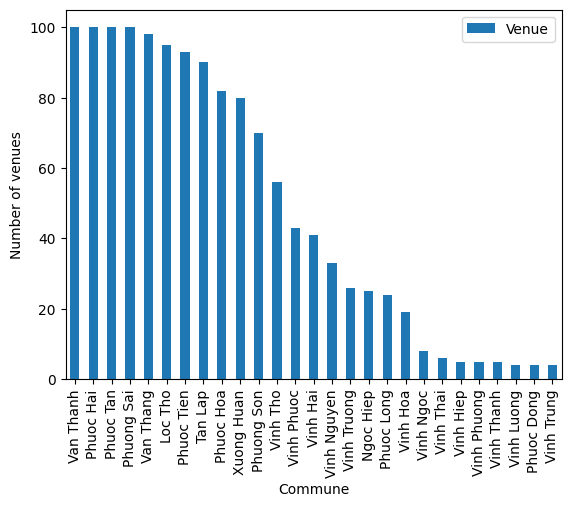

In [27]:
# The communes and wards with the most venues
import matplotlib

nhatrang_total_venues = nhatrang_venues.groupby('Commune').count().reset_index()[["Commune", "Venue"]]
ax = nhatrang_total_venues.sort_values(by="Venue", ascending=False).plot(x="Commune", y="Venue", kind="bar")
ax.set_ylabel("Number of venues")

Text(0, 0.5, 'Number of categories')

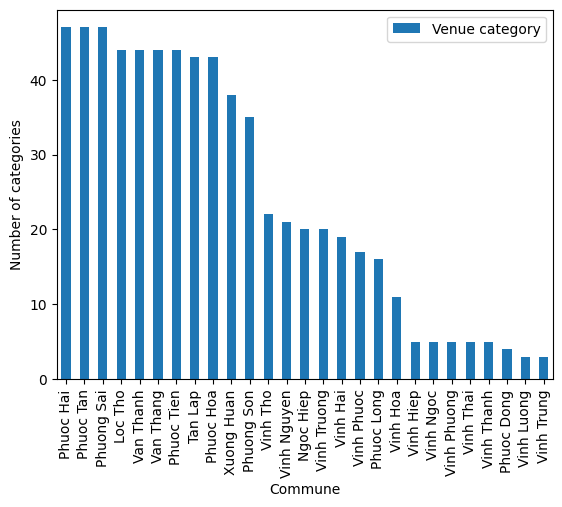

In [28]:
# The communes and wards with the most types of businesses
nhatrang_venues_category = (nhatrang_venues.groupby(['Commune','Venue category']).count().reset_index()[['Commune', 'Venue category']]
                            .groupby('Commune').count().reset_index())

ax = nhatrang_venues_category.sort_values(by="Venue category", ascending=False).plot(x="Commune", y="Venue category", kind="bar")
ax.set_ylabel("Number of categories")

In [29]:
# The top 10 most popular types of businesses
most_types_venues = nhatrang_venues.groupby('Venue category').count().sort_values(by="Venue", ascending=False).reset_index()[["Venue category", "Venue"]]
most_types_venues.head(10)

,Venue category,Venue
0,Hotel,145
1,Vietnamese Restaurant,129
2,Café,126
3,Coffee Shop,81
4,Beach,55
5,Spa,48
6,Restaurant,36
7,Seafood Restaurant,35
8,Shopping Mall,29
9,Bistro,26


In [30]:
# Calculate the average frequency of business types in communes and wards after using One-hot encoding
nhatrang_encoding = pd.get_dummies(nhatrang_venues[['Venue category']], prefix="", prefix_sep="")
nhatrang_encoding['Commune'] = nhatrang_venues['Commune'] 
nhatrang_encoding = nhatrang_encoding[[nhatrang_encoding.columns[-1]] + list(nhatrang_encoding.columns[:-1])]
nhatrang_avg_encoding = nhatrang_encoding.groupby('Commune').mean().reset_index()
nhatrang_avg_encoding

,Commune,Aquarium,Arts and Entertainment,Asian Restaurant,Attraction,BBQ Joint,Bakery,Bar,Beach,Beach Bar,...,Soup Spot,Spa,Sporting Goods Retail,Sports Bar,Supermarket,Sushi Restaurant,Thai Restaurant,Tourist Information and Service,Vegan and Vegetarian Restaurant,Vietnamese Restaurant
0,Loc Tho,0.000000,0.00,0.010526,0.00,0.021053,0.021053,0.010526,0.031579,0.000000,...,0.021053,0.031579,0.00,0.010526,0.010526,0.010526,0.010526,0.031579,0.010526,0.073684
1,Ngoc Hiep,0.000000,0.00,0.000000,0.00,0.040000,0.040000,0.000000,0.000000,0.000000,...,0.000000,0.040000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.080000
2,Phuoc Dong,0.000000,0.00,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Phuoc Hai,0.000000,0.00,0.020000,0.00,0.040000,0.010000,0.010000,0.030000,0.020000,...,0.020000,0.040000,0.01,0.010000,0.000000,0.010000,0.010000,0.020000,0.010000,0.100000
4,Phuoc Hoa,0.000000,0.00,0.012195,0.00,0.012195,0.024390,0.012195,0.024390,0.000000,...,0.012195,0.024390,0.00,0.012195,0.012195,0.012195,0.012195,0.036585,0.012195,0.048780
5,Phuoc Long,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.125000,0.000000,...,0.000000,0.041667,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667
6,Phuoc Tan,0.000000,0.00,0.020000,0.00,0.030000,0.010000,0.010000,0.040000,0.020000,...,0.010000,0.040000,0.01,0.010000,0.000000,0.010000,0.010000,0.020000,0.010000,0.100000
7,Phuoc Tien,0.000000,0.00,0.010753,0.00,0.021505,0.021505,0.010753,0.032258,0.000000,...,0.021505,0.032258,0.00,0.010753,0.010753,0.010753,0.010753,0.032258,0.010753,0.075269
8,Phuong Sai,0.000000,0.00,0.020000,0.00,0.010000,0.020000,0.000000,0.040000,0.010000,...,0.020000,0.040000,0.00,0.010000,0.000000,0.010000,0.010000,0.020000,0.010000,0.090000
9,Phuong Son,0.000000,0.00,0.028571,0.00,0.014286,0.028571,0.000000,0.028571,0.000000,...,0.028571,0.028571,0.00,0.000000,0.014286,0.014286,0.014286,0.014286,0.014286,0.100000


In [31]:
# The top 10 most popular types of businesses in each commune and ward base on the average frequency
def common_venues(row):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:10]

columns = ['Commune']
for ind in np.arange(10):
    columns.append(ind+1)

top_type = pd.DataFrame(columns=columns)
top_type['Commune'] = nhatrang_avg_encoding['Commune']

for ind in np.arange(nhatrang_avg_encoding.shape[0]):
    top_type.iloc[ind, 1:] = common_venues(nhatrang_avg_encoding.iloc[ind, :])

top_type

,Commune,1,2,3,4,5,6,7,8,9,10
0,Loc Tho,Hotel,Café,Vietnamese Restaurant,Coffee Shop,Spa,Indian Restaurant,Beach,Tourist Information and Service,Juice Bar,Hookah Bar
1,Ngoc Hiep,Hot Spring,Vietnamese Restaurant,Shopping Mall,Spa,Coffee Shop,Fried Chicken Joint,Korean Restaurant,River,Café,Bus Line
2,Phuoc Dong,Fuel Station,Attraction,Buffet,Spa,Motel,Pier,Park,Outlet Store,Outdoor Sculpture,Night Club
3,Phuoc Hai,Hotel,Vietnamese Restaurant,Café,Coffee Shop,Italian Restaurant,BBQ Joint,Spa,Restaurant,Beach,Beach Bar
4,Phuoc Hoa,Café,Hotel,Vietnamese Restaurant,Coffee Shop,Shopping Mall,Indian Restaurant,Tourist Information and Service,Spa,Juice Bar,Hookah Bar
5,Phuoc Long,Hotel,Beach,Restaurant,Resort,Eastern European Restaurant,Hotel Pool,Clothing Store,Spa,Seafood Restaurant,Russian Restaurant
6,Phuoc Tan,Hotel,Vietnamese Restaurant,Café,Coffee Shop,Spa,Italian Restaurant,Beach,BBQ Joint,Restaurant,Indian Restaurant
7,Phuoc Tien,Café,Hotel,Vietnamese Restaurant,Coffee Shop,Shopping Mall,Indian Restaurant,Beach,Tourist Information and Service,Spa,Movie Theater
8,Phuong Sai,Hotel,Café,Vietnamese Restaurant,Coffee Shop,Beach,Spa,Bistro,Juice Bar,Restaurant,Seafood Restaurant
9,Phuong Son,Hotel,Café,Vietnamese Restaurant,Coffee Shop,Shopping Mall,Spa,Restaurant,Food Court,Soup Spot,Movie Theater


# K-means clustering

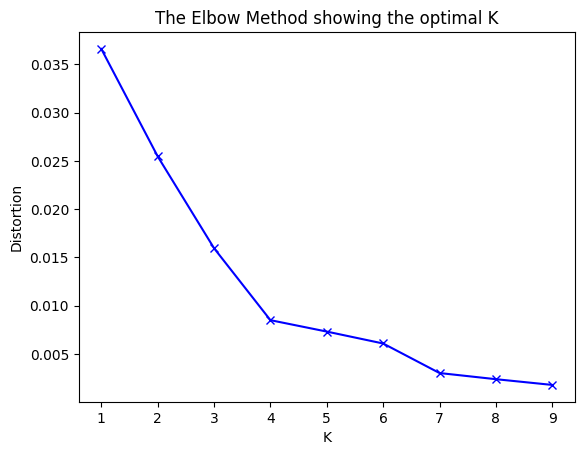

In [32]:
# Utilize the elbow method to visualize the intertia for different values of K
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

nhatrang_coffee_encoding = nhatrang_avg_encoding[["Commune", "Coffee Shop"]]
clustering = nhatrang_coffee_encoding.drop(["Commune"], axis = 1)

distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(clustering)
    distortions.append(sum(np.min(cdist(clustering, kmeans.cluster_centers_, 'euclidean'), axis=1)) / clustering.shape[0])

plt.plot(range(1, 10), distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal K')
plt.show()

In [33]:
# Create dataframe that includes the "Cluster label" column (K = 3)
kmeans = KMeans(n_clusters=3, random_state=0).fit(clustering)
nhatrang_kmeans = nhatrang_coffee_encoding.copy()
nhatrang_kmeans["Cluster label"] = kmeans.labels_
nhatrang_kmeans

,Commune,Coffee Shop,Cluster label
0,Loc Tho,0.073684,2
1,Ngoc Hiep,0.040000,2
2,Phuoc Dong,0.000000,0
3,Phuoc Hai,0.050000,2
4,Phuoc Hoa,0.048780,2
5,Phuoc Long,0.000000,0
6,Phuoc Tan,0.050000,2
7,Phuoc Tien,0.053763,2
8,Phuong Sai,0.080000,2
9,Phuong Son,0.057143,2


In [34]:
# Merge "nhatrang_kmeans" dataframe with "nhatrang" dataframe to add latitude and longitude for each neighborhood
nhatrang_kmeans = nhatrang_kmeans.join(nhatrang.set_index("Commune"), on="Commune")
nhatrang_kmeans.sort_values(["Cluster label"], inplace=True)
nhatrang_kmeans

,Commune,Coffee Shop,Cluster label,Latitude,Longitude,Square,Population,Density,Housing price,Total company
24,Vinh Trung,0.000000,0,12.256085,109.133644,8.73,6725,770,17.9,261
2,Phuoc Dong,0.000000,0,12.189857,109.167085,56.65,19095,337,29.8,986
5,Phuoc Long,0.000000,0,12.212176,109.194663,4.27,17101,4005,49.5,2353
20,Vinh Phuong,0.000000,0,12.273159,109.146709,32.44,9539,294,10.2,387
18,Vinh Nguyen,0.030303,0,12.212790,109.211532,42.62,17969,422,45.2,1250
16,Vinh Luong,0.000000,0,12.337415,109.196492,47.05,12780,272,5.5,230
14,Vinh Hiep,0.000000,0,12.254999,109.160550,2.66,6019,2263,30.0,1358
22,Vinh Thanh,0.200000,1,12.258530,109.149075,0.82,12246,14934,17.7,686
21,Vinh Thai,0.166667,1,12.240119,109.162807,15.34,6534,426,37.2,526
17,Vinh Ngoc,0.125000,1,12.267589,109.162561,8.53,10125,1187,29.0,789


In [35]:
# Set color scheme for the clusters
import matplotlib.cm as cm
import matplotlib.colors as colors

x = np.arange(3)
ys = [i+x+(i*x)**2 for i in range(3)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [36]:
# Create map and add K-means clustering markers to the map
map_kmeans = folium.Map(location=[latitude, longitude], zoom_start=12)

markers_colors = []
for lat, lon, poi, cluster in zip(nhatrang_kmeans['Latitude'], nhatrang_kmeans['Longitude'], nhatrang_kmeans['Commune'], nhatrang_kmeans['Cluster label']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon], radius=5, popup=label, color=rainbow[cluster-1], fill=True, fill_color=rainbow[cluster-1], fill_opacity=0.7).add_to(map_kmeans)    
map_kmeans

# K-modes clustering

In [37]:
# Count the coffee shop venues by communes and wards
coffee_shop = nhatrang_venues[nhatrang_venues["Venue category"] == "Coffee Shop"]
coffee_shop = coffee_shop[['Commune','Venue']].groupby(['Commune']).agg('count').reset_index()
coffee_shop = nhatrang.merge(coffee_shop,on='Commune',how='left')[["Commune", "Venue"]]
coffee_shop['Venue'] = coffee_shop['Venue'].fillna(0)
coffee_shop

,Commune,Venue
0,Loc Tho,7.0
1,Ngoc Hiep,1.0
2,Phuoc Dong,0.0
3,Phuoc Hai,5.0
4,Phuoc Hoa,4.0
5,Phuoc Long,0.0
6,Phuoc Tan,5.0
7,Phuoc Tien,5.0
8,Phuong Sai,8.0
9,Phuong Son,4.0


In [38]:
# Convert quantitative data into categorical data
coffee_shop['Venue'].describe()
coffee_shop['Type'] = coffee_shop.apply(lambda x: 'Low' if (x['Venue'] >= 0 and x['Venue'] < 1) 
                                   else ('Medium' if (x['Venue'] >= 1 and x['Venue'] < 3) 
                                         else ('High' if (x['Venue'] >=3 and x['Venue'] < 5)
                                                else 'Very high')), axis = 1)
coffee_shop.drop(columns="Venue", inplace=True)
coffee_shop

,Commune,Type
0,Loc Tho,Very high
1,Ngoc Hiep,Medium
2,Phuoc Dong,Low
3,Phuoc Hai,Very high
4,Phuoc Hoa,High
5,Phuoc Long,Low
6,Phuoc Tan,Very high
7,Phuoc Tien,Very high
8,Phuong Sai,Very high
9,Phuong Son,High


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 44.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 44.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 44.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 44.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 44.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7, cost: 36.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 39.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration

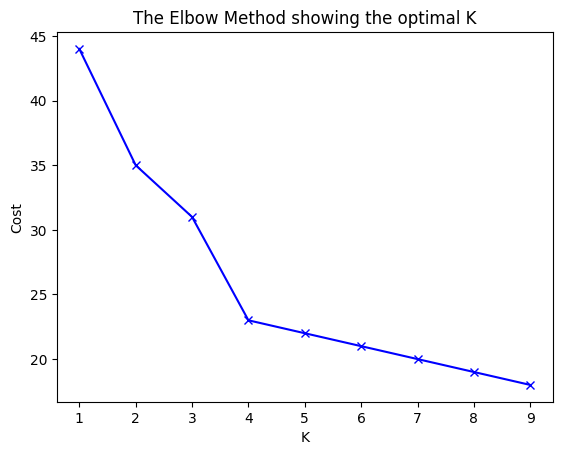

In [39]:
# Utilize the elbow method to visualize the intertia for different values of K
from kmodes.kmodes import KModes

cost = []
for num_clusters in range(1,10):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(coffee_shop)
    cost.append(kmode.cost_)
    
plt.plot(range(1,10), cost, 'bx-')
plt.xlabel('K')
plt.ylabel('Cost')
plt.title('The Elbow Method showing the optimal K')
plt.show()

In [40]:
# Create dataframe that includes the "Cluster label" column (K = 3)
kmodes = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
nhatrang_kmodes = coffee_shop.copy()
nhatrang_kmodes["Cluster label"] = kmodes.fit_predict(coffee_shop)
nhatrang_kmodes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 30.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 32.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 28.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 9, cost: 32.0
Run 4, iteration: 2/100, moves: 0, cost: 32.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 34.0
Best run was number 3


,Commune,Type,Cluster label
0,Loc Tho,Very high,1
1,Ngoc Hiep,Medium,2
2,Phuoc Dong,Low,0
3,Phuoc Hai,Very high,1
4,Phuoc Hoa,High,0
5,Phuoc Long,Low,0
6,Phuoc Tan,Very high,1
7,Phuoc Tien,Very high,1
8,Phuong Sai,Very high,1
9,Phuong Son,High,0


In [41]:
# Merge "nhatrang_kmodes" dataframe with "nhatrang" dataframe to add latitude and longitude for each neighborhood
nhatrang_kmodes = nhatrang_kmodes.join(nhatrang.set_index("Commune"), on="Commune")
nhatrang_kmodes.sort_values(["Cluster label"], inplace=True)
nhatrang_kmodes

,Commune,Type,Cluster label,Latitude,Longitude,Square,Population,Density,Housing price,Total company
26,Xuong Huan,High,0,12.255899,109.195282,0.64,13353,20864,150.3,772
24,Vinh Trung,Low,0,12.256085,109.133644,8.73,6725,770,17.9,261
2,Phuoc Dong,Low,0,12.189857,109.167085,56.65,19095,337,29.8,986
4,Phuoc Hoa,High,0,12.236575,109.184778,1.01,12657,12532,91.4,1178
5,Phuoc Long,Low,0,12.212176,109.194663,4.27,17101,4005,49.5,2353
20,Vinh Phuong,Low,0,12.273159,109.146709,32.44,9539,294,10.2,387
19,Vinh Phuoc,High,0,12.269764,109.197395,1.70,24445,14379,46.5,1075
16,Vinh Luong,Low,0,12.337415,109.196492,47.05,12780,272,5.5,230
9,Phuong Son,High,0,12.250533,109.178639,0.46,10039,21824,24.8,551
14,Vinh Hiep,Low,0,12.254999,109.160550,2.66,6019,2263,30.0,1358


In [42]:
# Create map and add K-means clustering markers to the map
map_kmodes = folium.Map(location=[latitude, longitude], zoom_start=12)
markers_colors = []
for lat, lon, poi, cluster in zip(nhatrang_kmodes['Latitude'], nhatrang_kmodes['Longitude'], nhatrang_kmodes['Commune'], nhatrang_kmodes['Cluster label']):
   label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
   folium.CircleMarker([lat, lon], radius=5, popup=label, color=rainbow[cluster-1], fill=True, fill_color=rainbow[cluster-1], fill_opacity=0.7).add_to(map_kmodes)
map_kmodes

# Other factors analysis:

In [43]:
# Classify the levels of average housing prices of the communes and wards of Nha Trang City
other_factors = nhatrang_kmeans[["Commune", "Housing price", "Density", "Cluster label", "Total company"]].reset_index(drop=True)
other_factors["Housing price"].describe()
other_factors['Housing price level'] = other_factors.apply(lambda x: 'Low' if (x['Housing price'] >= 5.5 and x['Housing price'] < 29.9) 
                                   else ('Medium' if (x['Housing price'] >= 29.9 and x['Housing price'] < 46.5) 
                                         else ('High' if (x['Housing price'] >= 46.5 and x['Housing price'] < 86.8) 
                                               else 'Very high')), axis = 1)
other_factors

,Commune,Housing price,Density,Cluster label,Total company,Housing price level
0,Vinh Trung,17.9,770,0,261,Low
1,Phuoc Dong,29.8,337,0,986,Low
2,Phuoc Long,49.5,4005,0,2353,High
3,Vinh Phuong,10.2,294,0,387,Low
4,Vinh Nguyen,45.2,422,0,1250,Medium
5,Vinh Luong,5.5,272,0,230,Low
6,Vinh Hiep,30.0,2263,0,1358,Medium
7,Vinh Thanh,17.7,14934,1,686,Low
8,Vinh Thai,37.2,426,1,526,Medium
9,Vinh Ngoc,29.0,1187,1,789,Low


In [44]:
# Classify the levels of population density of the communes and wards of Nha Trang City
other_factors["Density"].describe()
other_factors['Density level'] = other_factors.apply(lambda x: 'Low' if (x['Density'] >= 272 and x['Density'] < 998.5) 
                                   else ('Medium' if (x['Density'] >= 998.5 and x['Density'] < 9144) 
                                         else ('High' if (x['Density'] >= 9144 and x['Density'] < 22428) 
                                               else 'Very high')), axis = 1)
other_factors

,Commune,Housing price,Density,Cluster label,Total company,Housing price level,Density level
0,Vinh Trung,17.9,770,0,261,Low,Low
1,Phuoc Dong,29.8,337,0,986,Low,Low
2,Phuoc Long,49.5,4005,0,2353,High,Medium
3,Vinh Phuong,10.2,294,0,387,Low,Low
4,Vinh Nguyen,45.2,422,0,1250,Medium,Low
5,Vinh Luong,5.5,272,0,230,Low,Low
6,Vinh Hiep,30.0,2263,0,1358,Medium,Medium
7,Vinh Thanh,17.7,14934,1,686,Low,High
8,Vinh Thai,37.2,426,1,526,Medium,Low
9,Vinh Ngoc,29.0,1187,1,789,Low,Medium


In [45]:
# Count the number of communes and wards according to each level of housing prices and population density
pd.DataFrame(other_factors.groupby(['Housing price level','Density level'])['Density level'].count())

Density level
Housing price level Density level               
High                High                       2
                    Medium                     1
                    Very high                  3
Low                 High                       2
                    Low                        4
                    Medium                     1
Medium              Low                        3
                    Medium                     4
Very high           High                       3
                    Very high                  4

In [46]:
# Filter the communes and ward have the low housing price level low and the high density level
other_factors[(other_factors['Housing price level'] == 'Low') & (other_factors['Density level'] == 'High')]

,Commune,Housing price,Density,Cluster label,Total company,Housing price level,Density level
7,Vinh Thanh,17.7,14934,1,686,Low,High
18,Phuong Son,24.8,21824,2,551,Low,High


In [47]:
# Filter the communes and ward have the low housing price level low and the medium density level
other_factors[(other_factors['Housing price level'] == 'Low') & (other_factors['Density level'] == 'Medium')]

,Commune,Housing price,Density,Cluster label,Total company,Housing price level,Density level
9,Vinh Ngoc,29.0,1187,1,789,Low,Medium
